# Lateness Prediction Data Analysis

This notebook combines all the analyses and visualizations from the project, including scatterplots, bar charts, correlation, and ANOVA for lateness frequency and its factors.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Load Data

In [4]:
# Load the CSV file
data = pd.read_csv('../data/data.csv')

# Map 'Lateness_Frequency' to numeric values
lateness_mapping = {
    'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4
}
data['Lateness_Frequency'] = data['Lateness_Frequency'].map(lateness_mapping)
data.head()

,Timestamp,Name,Grade,Lateness_Frequency,Gaming_Min,Social_Media_Min,Sleep_Min,Tutoring_Min,Has_Checklist,Reason_Lazyness,Reason_Forgetfulness,Reason_Extracurriculars,Reason_TightDeadlines,External_Factors
0,2025-01-05 13:50:39,TEMPE,11,1,180.0,240,480,0,False,True,False,False,False,Eating
1,2025-01-05 13:54:30,cho lee,11,2,40.0,120,360,90,True,True,False,True,True,Sports
2,2025-01-05 14:09:25,RRW,11,3,360.0,240,480,60,False,True,True,False,False,Health issues
3,2025-01-05 16:22:45,Samuel,11,2,60.0,120,480,90,False,True,False,False,True,Busy
4,2025-01-05 18:35:18,Anonymous,11,0,120.0,240,510,0,True,False,False,False,False,Yangking


# Mode

In [5]:
# Show the mode for all columns in the dataset
modes = data.mode().iloc[0]
print("Mode for each column:")
display(modes)

Mode for each column:


Timestamp                  2025-01-05 08:35:24
Name                                 Anonymous
Grade                                     11.0
Lateness_Frequency                         2.0
Gaming_Min                               120.0
Social_Media_Min                         120.0
Sleep_Min                                480.0
Tutoring_Min                               0.0
Has_Checklist                            False
Reason_Lazyness                          False
Reason_Forgetfulness                      True
Reason_Extracurriculars                   True
Reason_TightDeadlines                    False
External_Factors                        Sports
Name: 0, dtype: object

## Scatterplot: Social Media Minutes vs Lateness Frequency

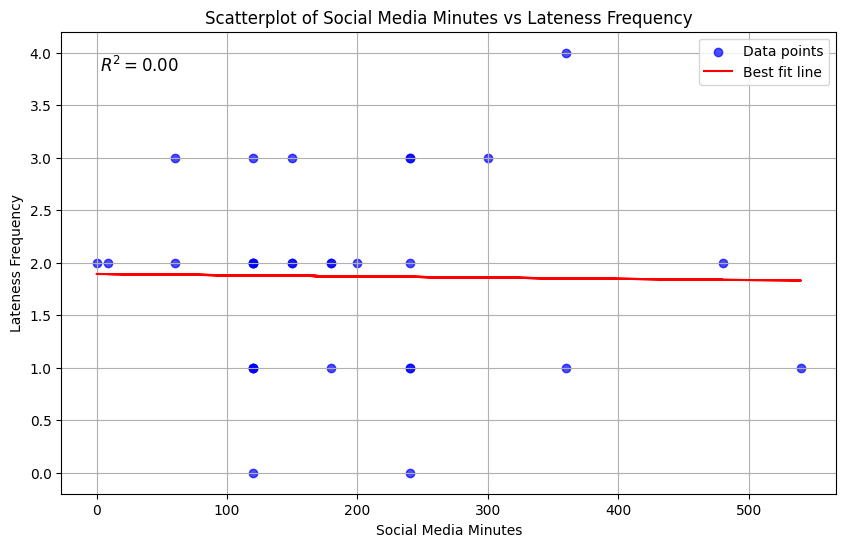

In [6]:
# Convert and clean
data['Social_Media_Min'] = pd.to_numeric(data['Social_Media_Min'], errors='coerce')
sm_data = data.dropna(subset=['Social_Media_Min', 'Lateness_Frequency'])

x = sm_data['Social_Media_Min']
y = sm_data['Lateness_Frequency']
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Best fit line')
plt.title('Scatterplot of Social Media Minutes vs Lateness Frequency')
plt.xlabel('Social Media Minutes')
plt.ylabel('Lateness Frequency')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

## Scatterplot: Tutoring Minutes vs Lateness Frequency

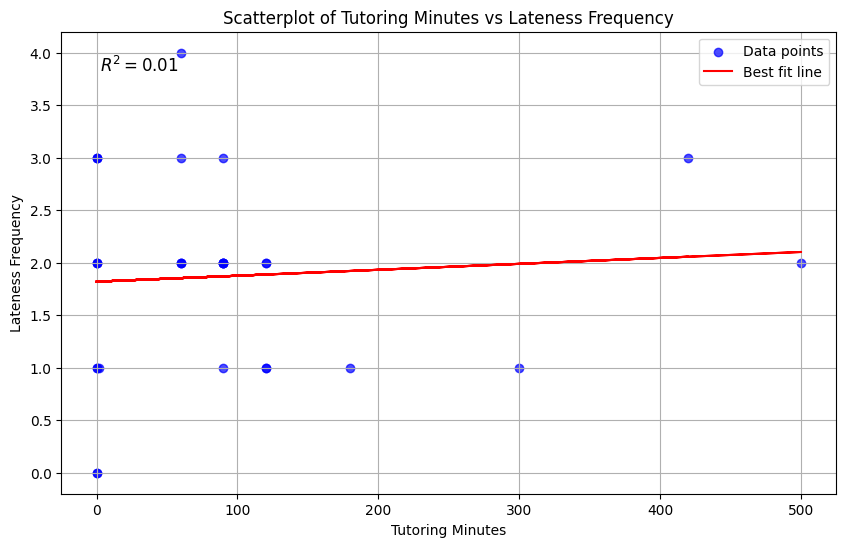

In [7]:
data['Tutoring_Min'] = pd.to_numeric(data['Tutoring_Min'], errors='coerce')
tut_data = data.dropna(subset=['Tutoring_Min', 'Lateness_Frequency'])

x = tut_data['Tutoring_Min']
y = tut_data['Lateness_Frequency']
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Best fit line')
plt.title('Scatterplot of Tutoring Minutes vs Lateness Frequency')
plt.xlabel('Tutoring Minutes')
plt.ylabel('Lateness Frequency')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

## Scatterplot: Gaming Minutes vs Lateness Frequency

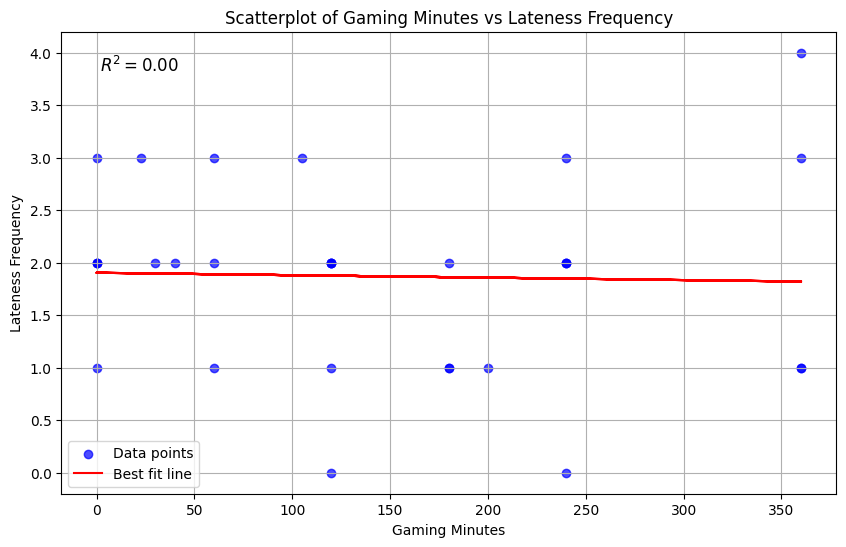

In [8]:
data['Gaming_Min'] = pd.to_numeric(data['Gaming_Min'], errors='coerce')
gm_data = data.dropna(subset=['Gaming_Min', 'Lateness_Frequency'])

x = gm_data['Gaming_Min']
y = gm_data['Lateness_Frequency']
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Best fit line')
plt.title('Scatterplot of Gaming Minutes vs Lateness Frequency')
plt.xlabel('Gaming Minutes')
plt.ylabel('Lateness Frequency')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

## Scatterplot: Sleep Minutes vs Lateness Frequency

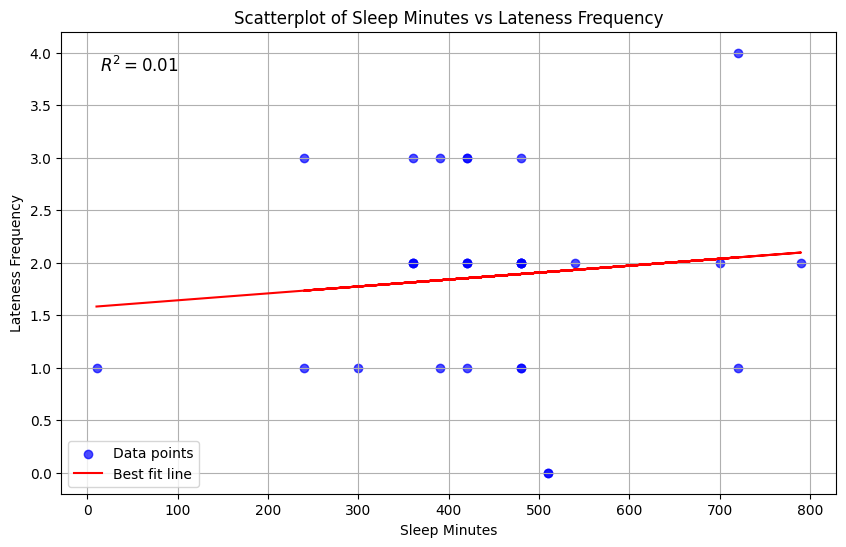

In [9]:
data['Sleep_Min'] = pd.to_numeric(data['Sleep_Min'], errors='coerce')
sl_data = data.dropna(subset=['Sleep_Min', 'Lateness_Frequency'])

x = sl_data['Sleep_Min']
y = sl_data['Lateness_Frequency']
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Best fit line')
plt.title('Scatterplot of Sleep Minutes vs Lateness Frequency')
plt.xlabel('Sleep Minutes')
plt.ylabel('Lateness Frequency')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

## Bar Chart: Average Lateness Frequency by External Factors

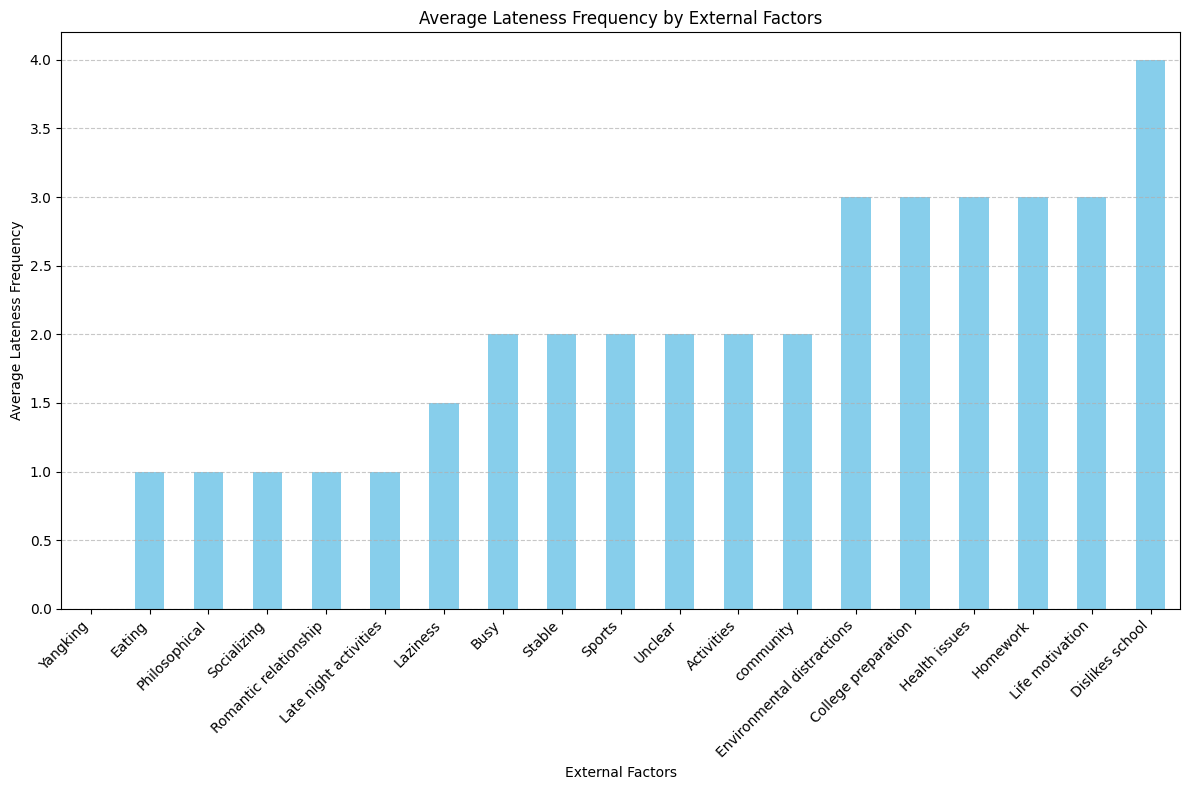

In [10]:
x_factor_analysis = data.groupby('External_Factors')['Lateness_Frequency'].mean().sort_values()

plt.figure(figsize=(12, 8))
x_factor_analysis.plot(kind='bar', color='skyblue')
plt.title('Average Lateness Frequency by External Factors')
plt.xlabel('External Factors')
plt.ylabel('Average Lateness Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation of External Factors vs Lateness Frequency

In [11]:
# One-hot encode External_Factors
external_dummies = pd.get_dummies(data['External_Factors'])
correlation_data = pd.concat([data['Lateness_Frequency'], external_dummies], axis=1)
correlation_matrix = correlation_data.corr()
lateness_correlations = correlation_matrix['Lateness_Frequency'].drop('Lateness_Frequency')

print("\n📊 Correlation between External Factors and Lateness Frequency:")
display(lateness_correlations.sort_values(ascending=False))


📊 Correlation between External Factors and Lateness Frequency:


Dislikes school               0.428716
Environmental distractions    0.227349
College preparation           0.227349
Life motivation               0.227349
Homework                      0.227349
Health issues                 0.227349
Sports                        0.046583
Stable                        0.025983
Activities                    0.025983
Unclear                       0.025983
community                     0.025983
Busy                          0.025983
Laziness                     -0.107448
Philosophical                -0.175384
Romantic relationship        -0.175384
Socializing                  -0.175384
Eating                       -0.175384
Late night activities        -0.175384
Yangking                     -0.376750
Name: Lateness_Frequency, dtype: float64

## Bar Chart: Average Lateness Frequency by Reason

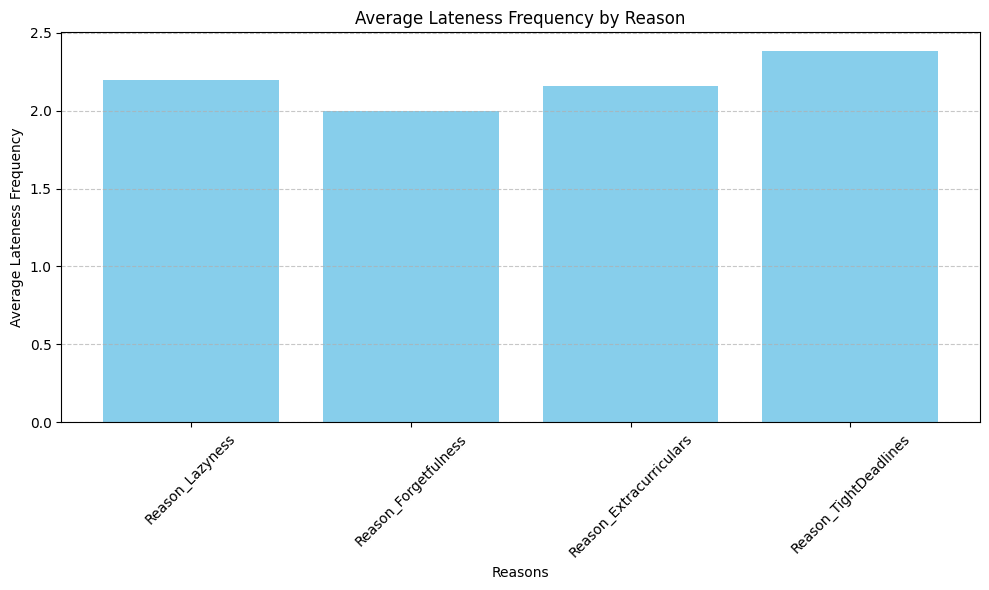

In [12]:
reasons = ['Reason_Lazyness', 'Reason_Forgetfulness', 'Reason_Extracurriculars', 'Reason_TightDeadlines']
average_lateness = {}
for reason in reasons:
    # Accept both boolean and string TRUE/FALSE
    mask = (data[reason] == True) | (data[reason] == 'TRUE')
    average_lateness[reason] = data[mask]['Lateness_Frequency'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lateness.keys(), average_lateness.values(), color='skyblue')
plt.title('Average Lateness Frequency by Reason')
plt.xlabel('Reasons')
plt.ylabel('Average Lateness Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation Heatmap: Reasons vs Lateness Frequency

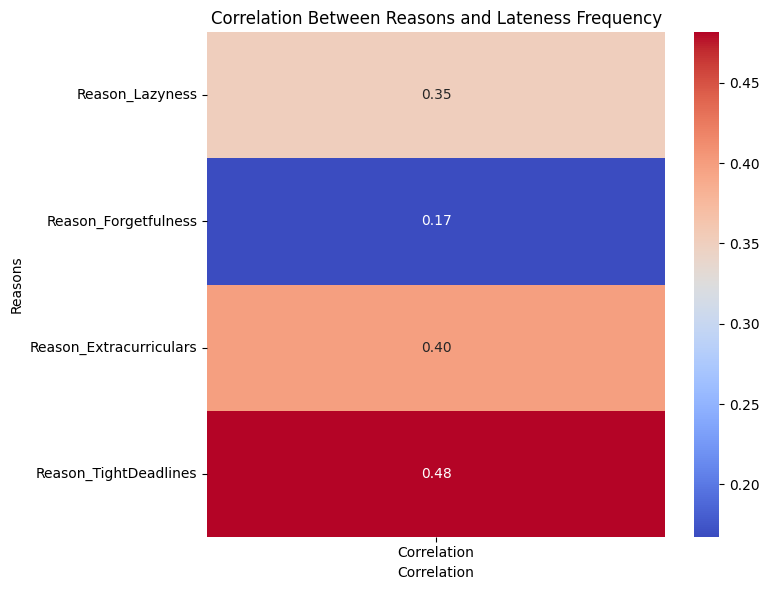

In [13]:
# Convert TRUE/FALSE to int if needed
for reason in reasons:
    if data[reason].dtype == object:
        data[reason] = data[reason].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})

correlations = {}
for reason in reasons:
    correlations[reason] = data[reason].astype(int).corr(data['Lateness_Frequency'])

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation Between Reasons and Lateness Frequency')
plt.xlabel('Correlation')
plt.ylabel('Reasons')
plt.tight_layout()
plt.show()